In [12]:
install.packages('maps')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [54]:
install.packages('openintro')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [55]:
library(tidyverse)
library(maps)
library(openintro)

Please visit openintro.org for free statistics materials

Attaching package: ‘openintro’

The following object is masked from ‘package:ggplot2’:

    diamonds

The following objects are masked from ‘package:datasets’:

    cars, trees



### Load mapping data to produce state maps and add column that contains the state abbreviations.

In [40]:
us_states <- map_data("state")

In [58]:
us_states['State'] <- state2abbr(us_states$region)

### Load the data file containing the attributes of the plans.

In [6]:
planData <- read_csv('/data/PDSI/PlanAttributes.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  AVCalculatorOutputNumber = col_double(),
  BeginPrimaryCareCostSharingAfterNumberOfVisits = col_double(),
  BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays = col_double(),
  BenefitPackageId = col_double(),
  BusinessYear = col_double(),
  ChildOnlyPlanId = col_logical(),
  CompositeRatingOffered = col_logical(),
  DEHBCombInnOonFamilyMOOP = col_logical(),
  DEHBCombInnOonFamilyPerGroupMOOP = col_logical(),
  DEHBCombInnOonFamilyPerPersonMOOP = col_logical(),
  DEHBCombInnOonIndividualMOOP = col_logical(),
  DEHBDedCombInnOonFamilyPerGroup = col_logical(),
  DEHBDedCombInnOonFamilyPerPerson = col_logical(),
  DEHBDedInnTier1FamilyPerGroup = col_logical(),
  DEHBDedInnTier1FamilyPerPerson = col_logical(),
  DEHBDedInnTier2FamilyPerGroup = col_logical(),
  DEHBDedInnTier2FamilyPerPerson = col_logical(),
  DEHBDedOutOfNetFamilyPerGroup = col_logical(),
  DEHBDedOutOfNetFamilyPerPerson = col_logical(),
  DEHBI

### Pull out the top plan for each state.

In [70]:
topPlanByName <- planData %>%
count(StateCode, PlanMarketingName, sort = TRUE) %>%
group_by(StateCode) %>%
slice(which.max(table(PlanMarketingName)))

### Combine this dataframe with state information dataframe to allow the creation of a state map containing the most popular plans in each state.

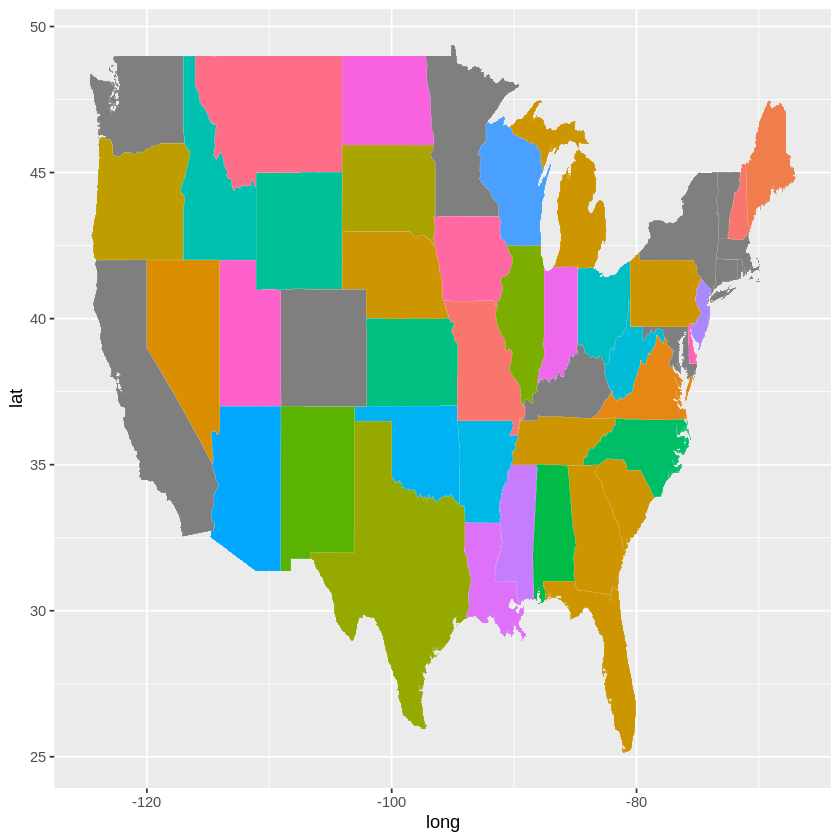

In [72]:
full_join(us_states, topPlanByName, by = c('State' = 'StateCode')) %>%
ggplot(aes(x = long, y = lat, group = group, fill = PlanMarketingName)) +
geom_polygon(color='gray90', size=0.05)+
guides(fill = FALSE)

#### Note: Some states are grey or "NA"... need to investigate why they don't seem to be in the dataset.  Also, the legend is huge for this thing because it contains full plan names.

### Take a look at the top plan type across the states.

In [88]:
topPlanByType <- planData %>%
count(StateCode, PlanType, sort = TRUE) %>%
group_by(StateCode) %>%
slice(which.max(table(PlanType)))

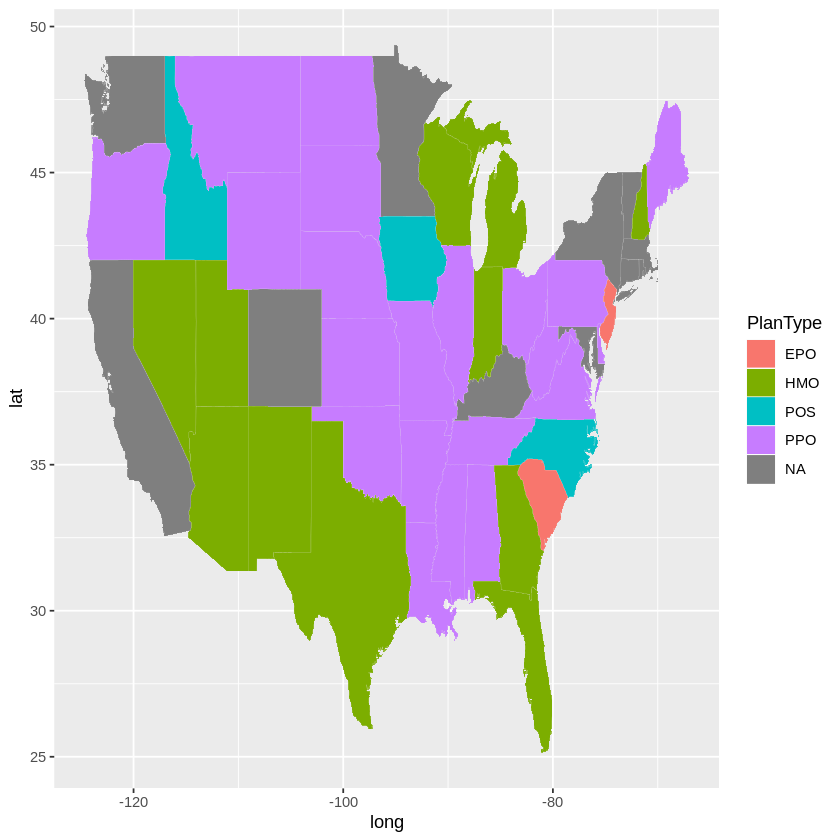

In [89]:
full_join(us_states, topPlanByType, by = c('State' = 'StateCode')) %>%
ggplot(aes(x = long, y = lat, group = group, fill = PlanType)) +
geom_polygon(color='gray90', size=0.05)

### Same analysis but my Plan ID.

In [92]:
topPlanByID <- planData %>%
count(StateCode, PlanId, sort = TRUE) %>%
group_by(StateCode) %>%
slice(which.max(table(PlanId)))

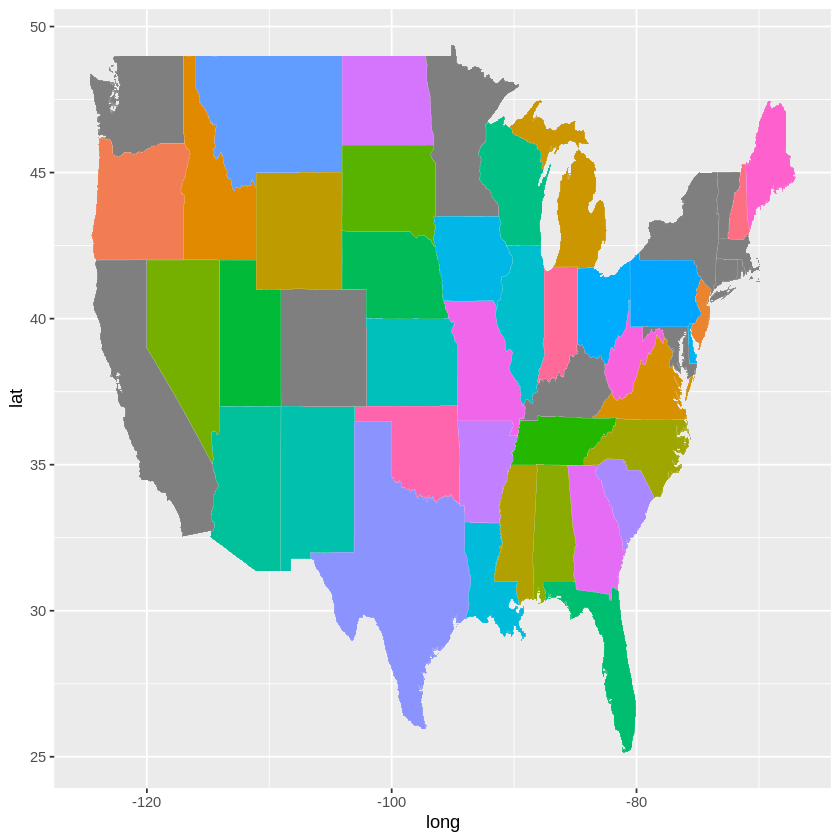

In [95]:
full_join(us_states, topPlanByID, by = c('State' = 'StateCode')) %>%
ggplot(aes(x = long, y = lat, group = group, fill = PlanId)) +
geom_polygon(color='gray90', size=0.05)+
guides(fill = FALSE)

### Look at the percentage of plans in each state that are dental only.

In [101]:
dentalOnlyPlans <- planData %>%
count(StateCode, DentalOnlyPlan)%>%
pivot_wider(names_from = DentalOnlyPlan, values_from = n)%>%
mutate(PerDentOnly = Yes / (No + Yes))

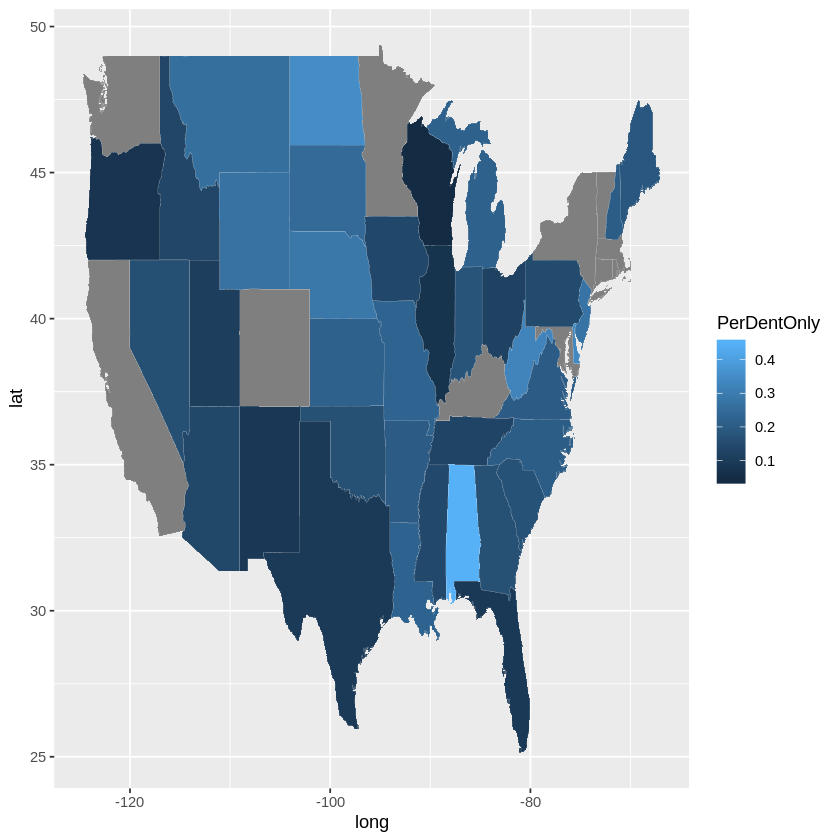

In [103]:
full_join(us_states, dentalOnlyPlans, by = c('State' = 'StateCode')) %>%
ggplot(aes(x = long, y = lat, group = group, fill = PerDentOnly)) +
geom_polygon(color='gray90', size=0.05)